In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print(df.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [4]:
# Keep only needed columns
df = df[['text', 'airline_sentiment']]

# Check for null values
print(df.isnull().sum())


text                 0
airline_sentiment    0
dtype: int64


In [5]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['polarity'] = df['text'].apply(get_sentiment)
df.head()


,text,airline_sentiment,polarity
0,@VirginAmerica What @dhepburn said.,neutral,0.000000
1,@VirginAmerica plus you've added commercials t...,positive,0.000000
2,@VirginAmerica I didn't today... Must mean I n...,neutral,-0.390625
3,@VirginAmerica it's really aggressive to blast...,negative,0.006250
4,@VirginAmerica and it's a really big bad thing...,negative,-0.350000


In [6]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['polarity'].apply(classify_sentiment)
df.head()


,text,airline_sentiment,polarity,predicted_sentiment
0,@VirginAmerica What @dhepburn said.,neutral,0.000000,neutral
1,@VirginAmerica plus you've added commercials t...,positive,0.000000,neutral
2,@VirginAmerica I didn't today... Must mean I n...,neutral,-0.390625,negative
3,@VirginAmerica it's really aggressive to blast...,negative,0.006250,positive
4,@VirginAmerica and it's a really big bad thing...,negative,-0.350000,negative


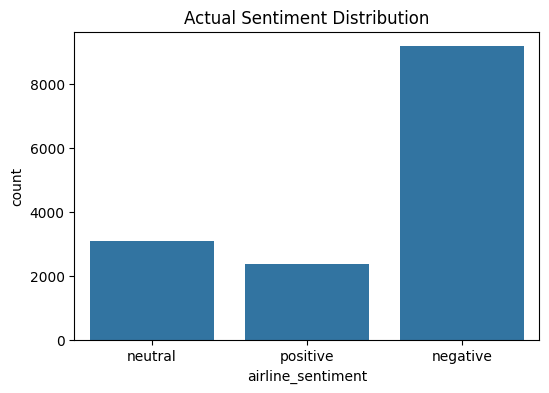

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='airline_sentiment')
plt.title("Actual Sentiment Distribution")
plt.show()


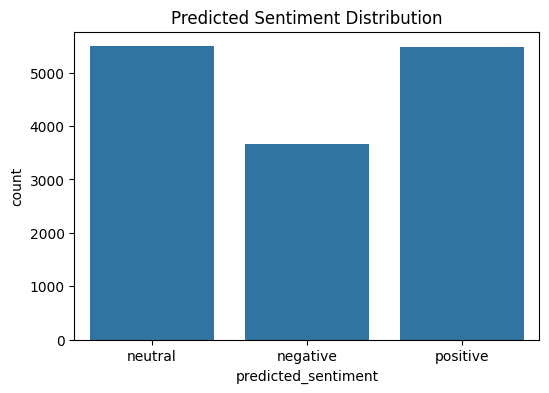

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='predicted_sentiment')
plt.title("Predicted Sentiment Distribution")
plt.show()


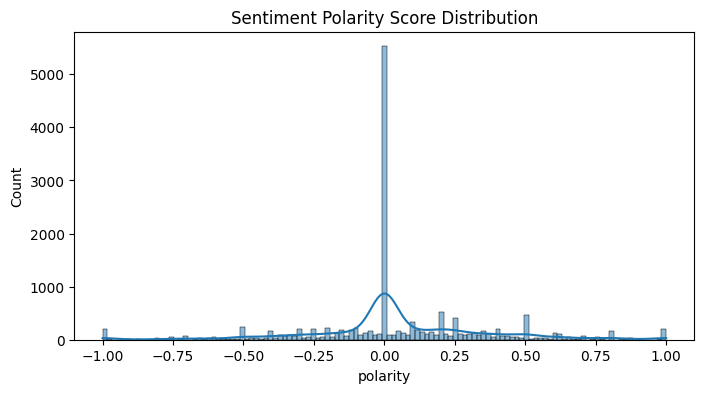

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['polarity'], kde=True)
plt.title("Sentiment Polarity Score Distribution")
plt.show()


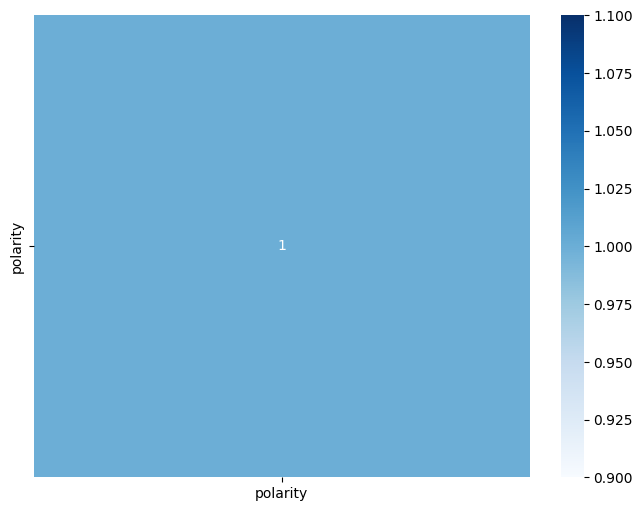

In [10]:
# Check numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()
